## Exploratory Analysis on Speed Occupancy and Flow Variables

### Purpose & Motivation
Conduct exploratory analysis on Flow, Speed, and Occupancy and generate plots that show the interaction between the two.

### Direction from Advisor
Conduct exploratory analysis.
 

### Tasks/Questions to Answer
#### Questions to Answer
- What is the relationship between each of the three variables?
- Can we learn anything about jam activity with relation to the variables?

#### Tasks
- Generate scatter plots that show the interaction of all three variables.

### Results/Conclusions
- Each of the three graphs have very distinct patterns that seem to hold across mulitple stations
- Most of the density of each graph is in the same location or along the same line; this may mean this is "normal" traffic and everything else is a jam state.

In [1]:
%matplotlib inline
data_5min_path = "../data/station_5min/2015/d11/"
import pandas as pd
import numpy as np
import gzip
import datetime as dt
from os import listdir
from os.path import isfile, join
import time
import matplotlib.pyplot as plt

### Load Data

In [2]:
onlyfiles = [f for f in listdir(data_5min_path) if isfile(join(data_5min_path, f))]
colnames = ['Timestamp', 'Station', 'District', 'Freeway #', 'Direction', 'Lane Type', 'Station Length', 'Samples', 
            '% Observed', 'TotalFlow', 'AvgOccupancy', 'AvgSpeed', 'Lane 1 Samples', 'Lane 1 Flow', 'Lane 1 Avg Occ', 'Lane 1 Avg Speed', 'Lane 1 Observed', 'Lane 2 Samples', 'Lane 2 Flow', 'Lane 2 Avg Occ', 'Lane 2 Avg Speed', 'Lane 2 Observed', 'Lane 3 Samples', 'Lane 3 Flow', 'Lane 3 Avg Occ', 'Lane 3 Avg Speed', 'Lane 3 Observed', 'Lane 4 Samples', 'Lane 4 Flow', 'Lane 4 Avg Occ', 'Lane 4 Avg Speed', 'Lane 4 Observed', 'Lane 5 Samples', 'Lane 5 Flow', 'Lane 5 Avg Occ', 'Lane 5 Avg Speed', 'Lane 5 Observed', 'Lane 6 Samples', 'Lane 6 Flow', 'Lane 6 Avg Occ', 'Lane 6 Avg Speed', 'Lane 6 Observed', 'Lane 7 Samples', 'Lane 7 Flow', 'Lane 7 Avg Occ', 'Lane 7 Avg Speed', 'Lane 7 Observed', 'Lane 8 Samples', 'Lane 8 Flow', 'Lane 8 Avg Occ', 'Lane 8 Avg Speed', 'Lane 8 Observed']

with gzip.open(data_5min_path+onlyfiles[0], 'rb') as f:
    file_content = pd.read_csv(f,header=None,names=colnames)
    
meta_path = "../station_5min/2015/meta_data/d11/"

### Find some healthy sensors

In [3]:
def count_bad_sensors(df):
    count_nan_df = df
    count_nan_df['Station'] = count_nan_df['Station'].astype(str)
    count_nan_df = count_nan_df[['Station','Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    num = count_nan_df._get_numeric_data()
    num[num > 0] = 0
    count_nan_df=count_nan_df.replace(np.nan,1)
    count_nan_df=count_nan_df.groupby('Station').sum().reset_index()
    count_nan_df['Total'] = count_nan_df['TotalFlow']+count_nan_df['AvgOccupancy']+count_nan_df['AvgSpeed']
    count_nan_df=count_nan_df.sort_values('Total')
    return count_nan_df

In [4]:
def calc_avg_obs(df):
    count_nan_df = df
    count_nan_df['Station'] = count_nan_df['Station'].astype(str)
    count_nan_df = count_nan_df[['Station','% Observed']]
    count_nan_df=count_nan_df.groupby('Station').mean().reset_index()
    return count_nan_df

In [5]:
df_missing = count_bad_sensors(file_content)
df_obs = calc_avg_obs(file_content)
df_missing = df_missing.ix[df_missing.Total == 0,'Station']
df_obs = df_obs.ix[df_obs['% Observed'] == 100,'Station']

### Plot some of the good ones

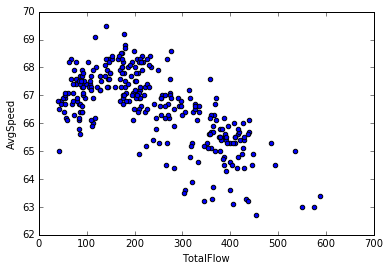

In [6]:
small_df = file_content.ix[file_content.Station == '1114050',['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
small_df.plot('TotalFlow','AvgSpeed','scatter')

### Do a big one

In [7]:
df_list = []
for i, filename in enumerate(onlyfiles):
    with gzip.open(data_5min_path+filename, 'rb') as f:
        file_content = pd.read_csv(f,header=None,names=colnames)
        df_list.append(file_content)
    if i == 30:
        break
big_df = pd.concat(df_list)

In [8]:
sensor_results = count_bad_sensors(big_df).reset_index(drop=True)

In [9]:
small_df['Power'] = small_df['TotalFlow'] * small_df['AvgSpeed'] # a manufactured variable we didn't use
small_df['Efficiency'] = small_df['AvgSpeed'] /  small_df['TotalFlow'] # a manufactured variable we didn't use
small_df['Density'] = small_df['TotalFlow'] / small_df['AvgSpeed']
small_df['Timestamp'] = pd.to_datetime(small_df['Timestamp'])
small_df['Time'] = small_df['Timestamp'].apply(lambda x:x.time())
small_df['Date'] = small_df['Timestamp'].apply(lambda x:x.date())
time_df = pd.DataFrame()
time_df['Time'] = small_df['Time'].unique()
time_df = time_df.sort_values('Time').reset_index(drop=True).reset_index()
small_df = small_df.merge(time_df)

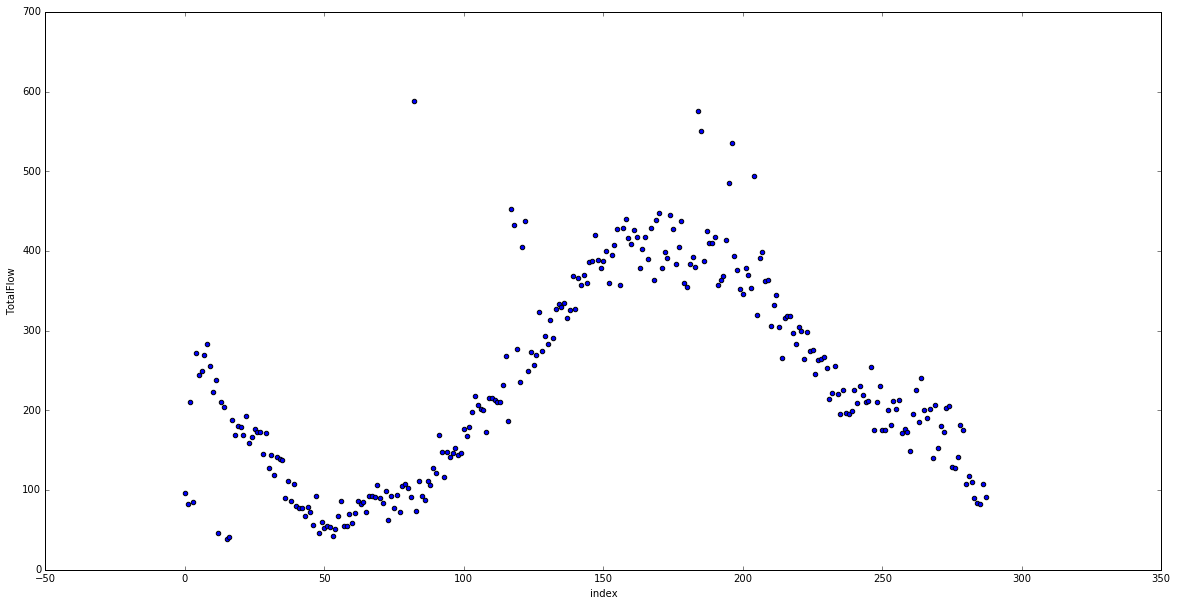

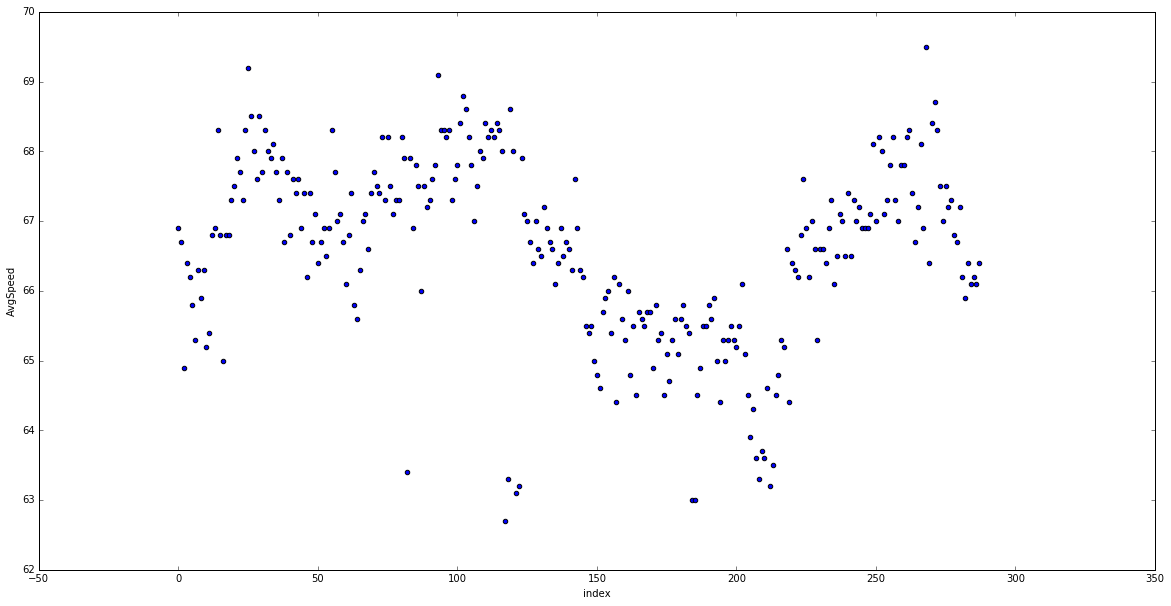

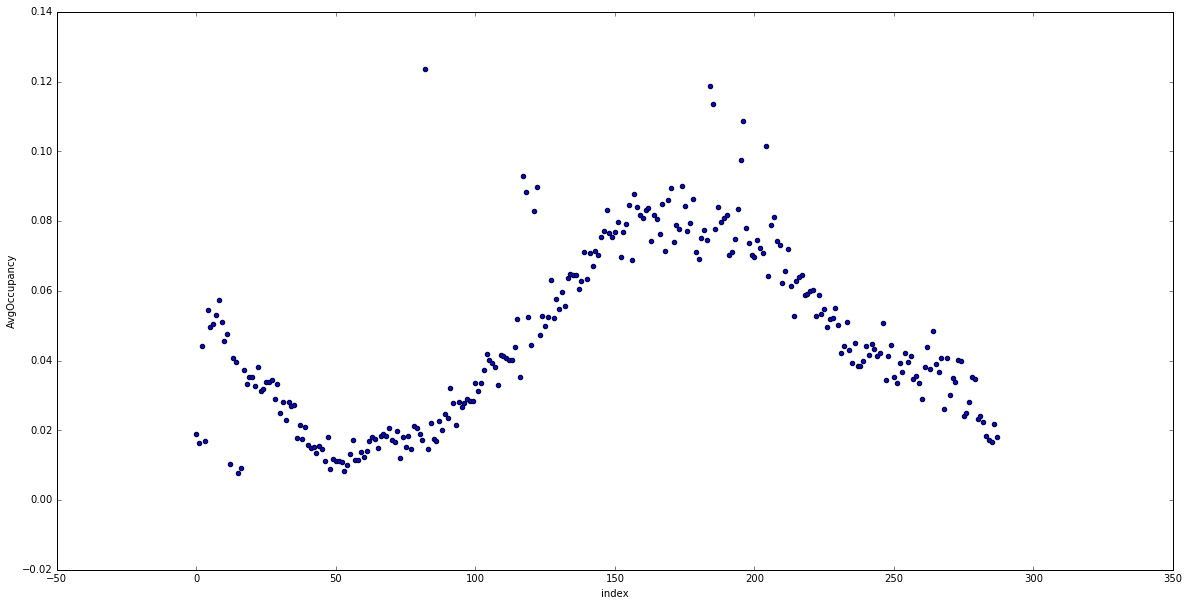

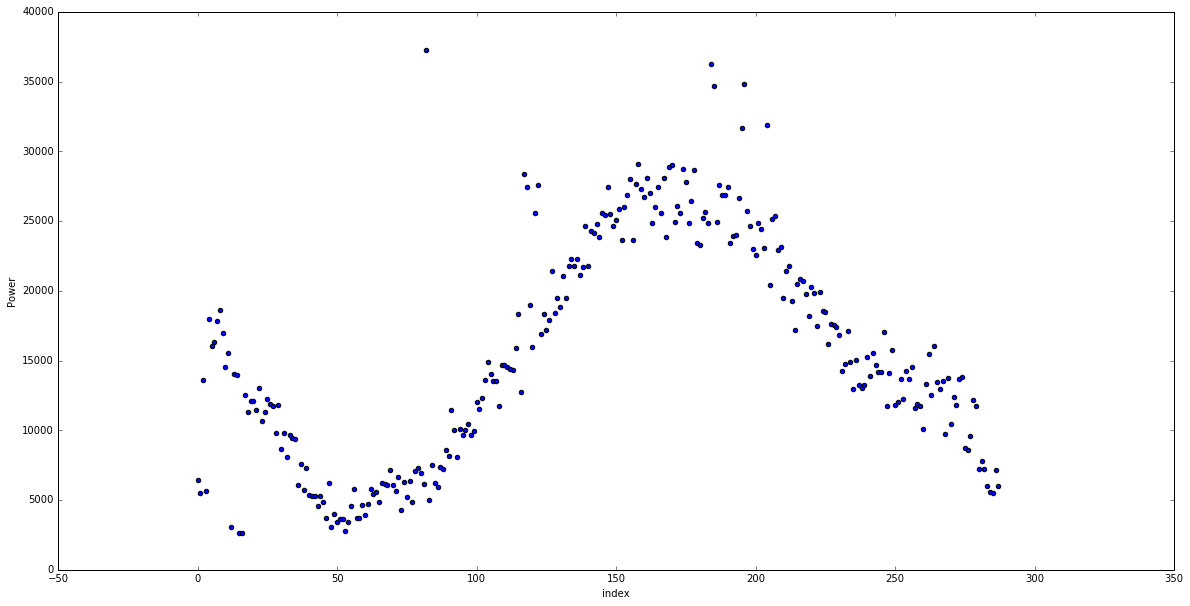

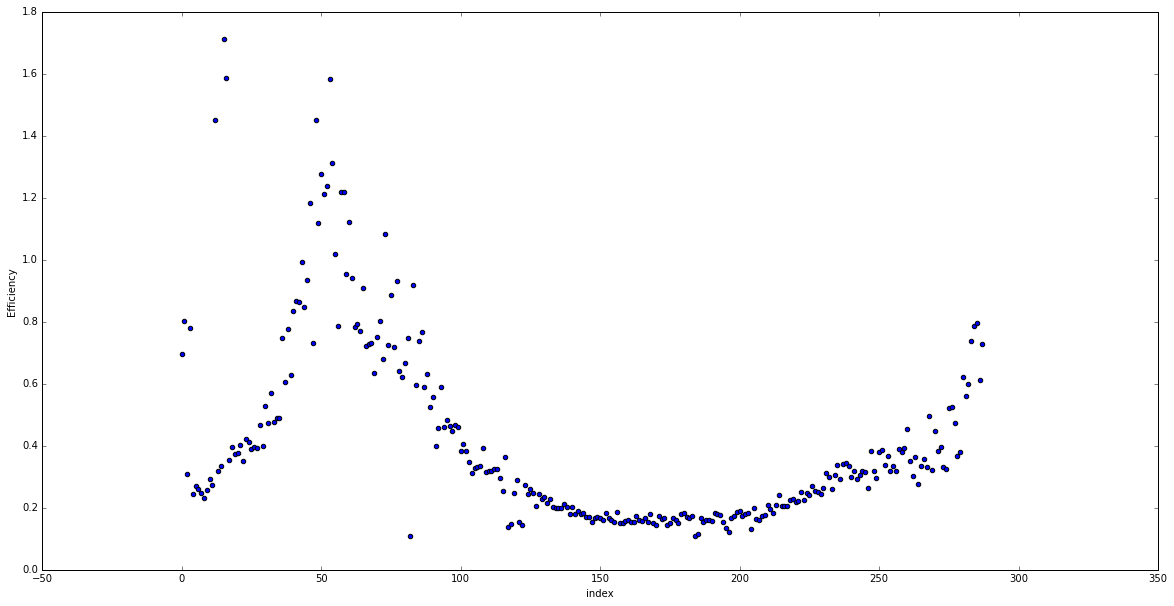

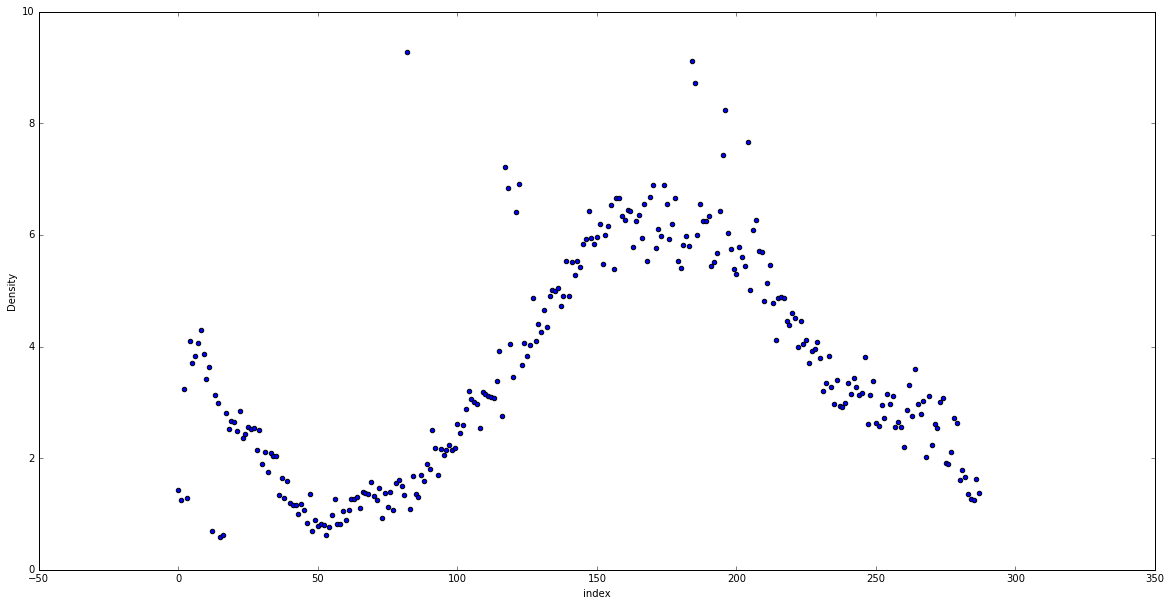

In [10]:
small_df.plot('index','TotalFlow','scatter', figsize=(20,10))
small_df.plot('index','AvgSpeed','scatter', figsize=(20,10))
small_df.plot('index','AvgOccupancy','scatter', figsize=(20,10))
small_df.plot('index','Power','scatter', figsize=(20,10))
small_df.plot('index','Efficiency','scatter', figsize=(20,10))
small_df.plot('index','Density','scatter', figsize=(20,10))

In [11]:
pivoted = small_df.pivot(index='Date', columns='Time', values='Power').reset_index()

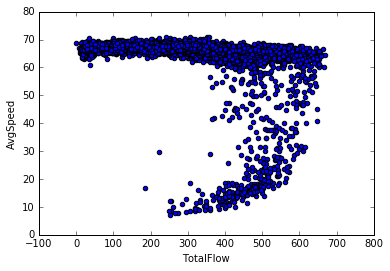

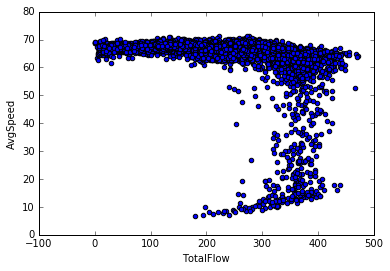

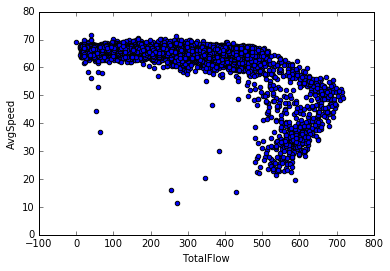

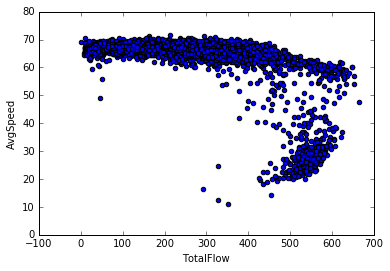

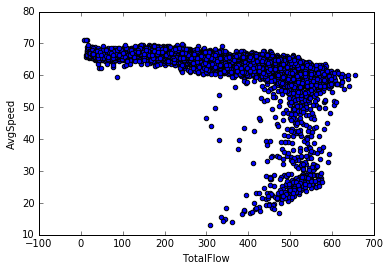

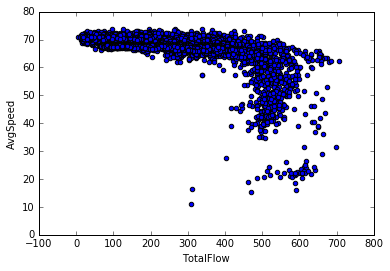

In [12]:
my_list = list(sensor_results.ix[:5,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    small_df.plot('TotalFlow','AvgSpeed','scatter')

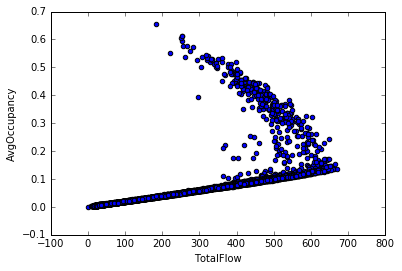

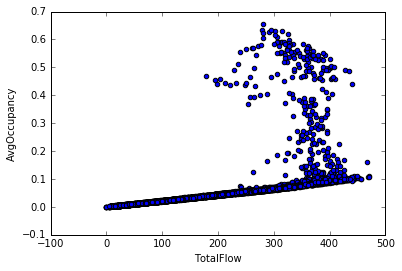

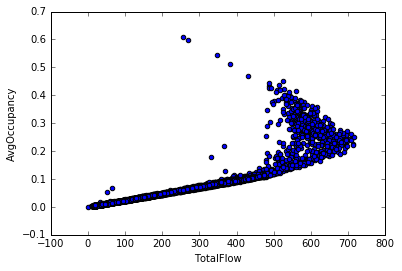

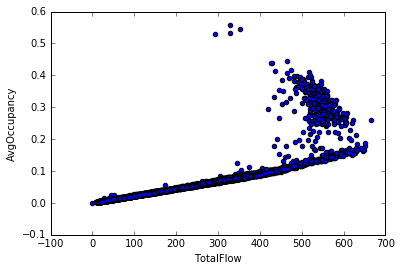

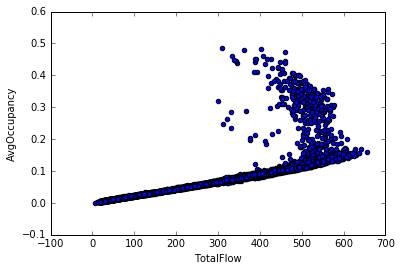

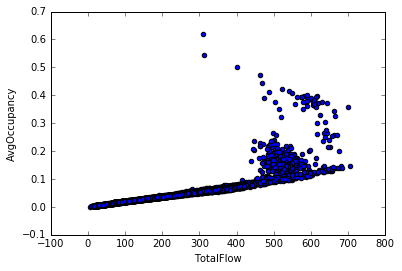

In [13]:
my_list = list(sensor_results.ix[:5,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    small_df.plot('TotalFlow','AvgOccupancy','scatter')

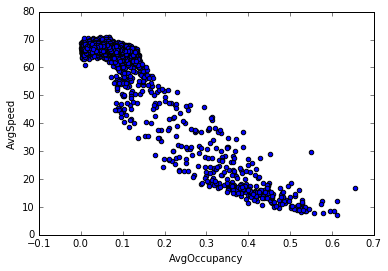

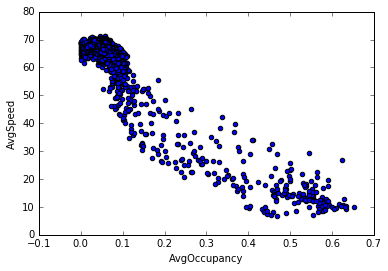

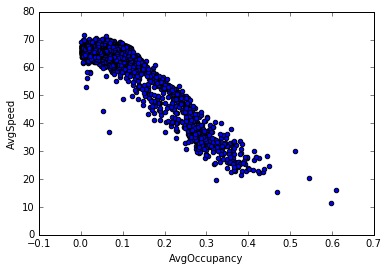

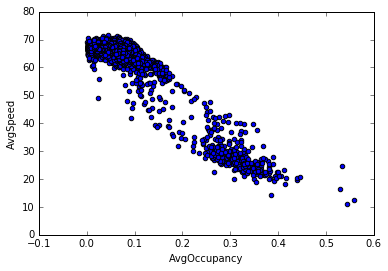

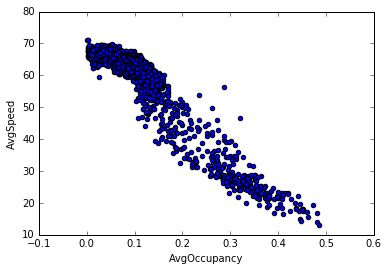

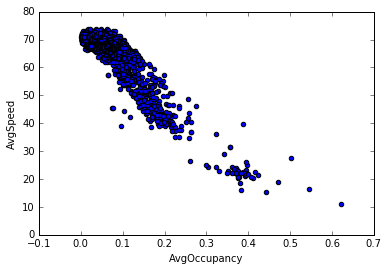

In [14]:
my_list = list(sensor_results.ix[:5,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    small_df.plot('AvgOccupancy','AvgSpeed','scatter')

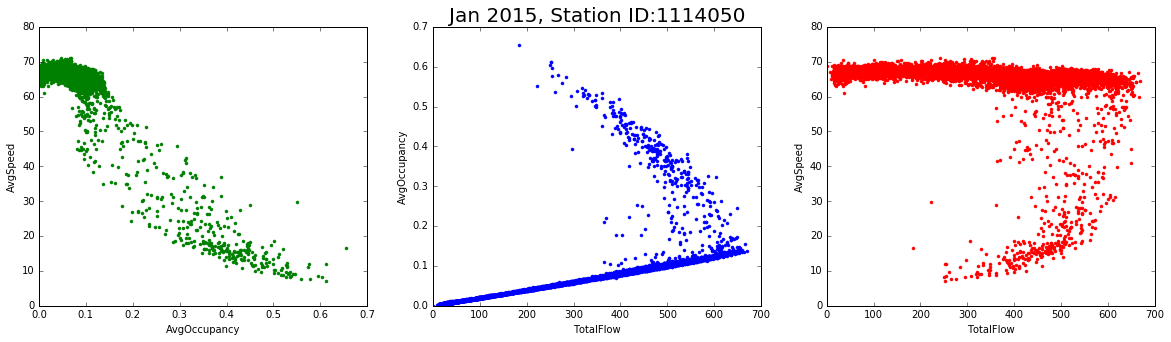

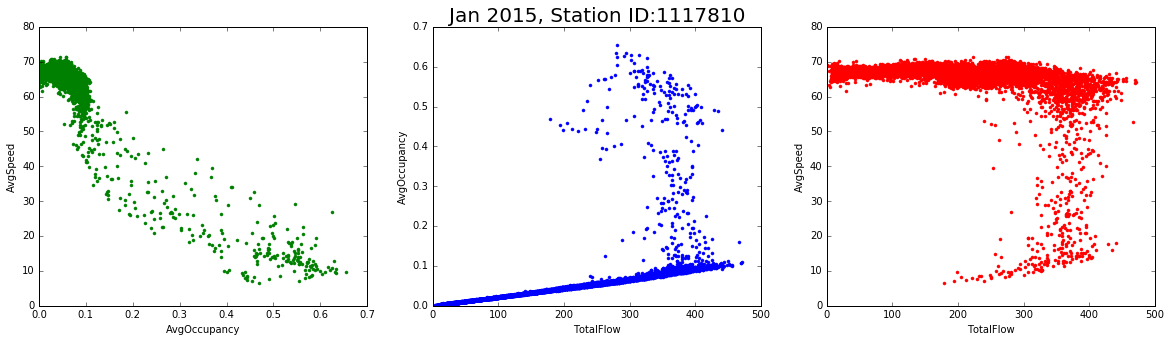

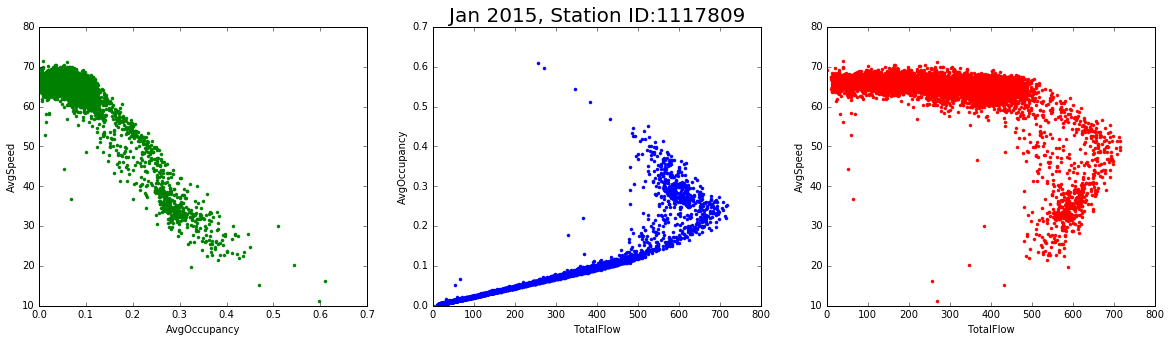

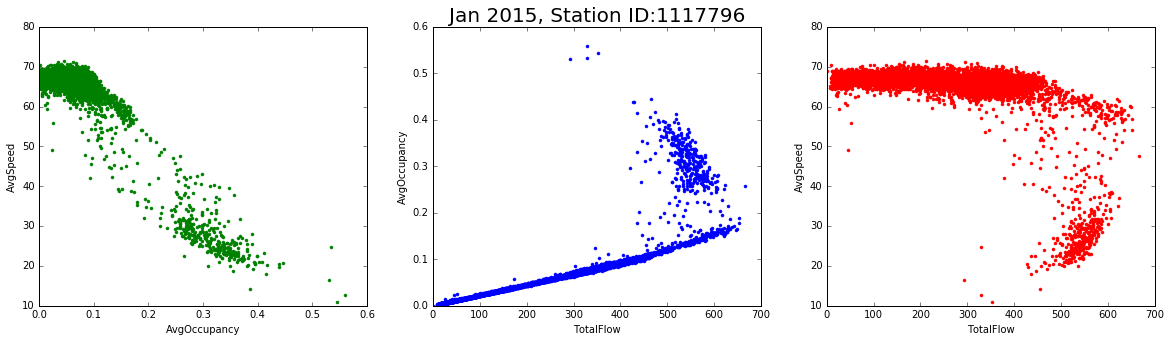

In [15]:
my_list = list(sensor_results.ix[:3,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]

    fig = plt.figure(figsize = (20,5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    plt.title('Jan 2015, Station ID:{}'.format(station),{'fontsize': 20})
    ax3 = fig.add_subplot(1, 3, 3)
    #ax3 = fig.add_subplot(2, 2, 4)
    ax1.plot(small_df.AvgOccupancy,small_df.AvgSpeed,'g.')
    ax2.plot(small_df.TotalFlow,small_df.AvgOccupancy,'b.')


    ax3.plot(small_df.TotalFlow,small_df.AvgSpeed,'r.')
    ax1.set_xlabel('AvgOccupancy')
    ax1.set_ylabel('AvgSpeed')
    ax2.set_xlabel('TotalFlow')
    ax2.set_ylabel('AvgOccupancy')
    ax3.set_xlabel('TotalFlow')
    ax3.set_ylabel('AvgSpeed')
    plt.show()
    #small_df.plot('Occ','Efficiency','scatter')